# **Introdução à Ciência de Dados**

**Professor**: Yuri Malheiros

**Grupo**: Daniel Arnóbio Dantas da Silva, Gustavo Henrique da Silva Costa Araujo e Jardel da Cunha Nascimento.

## **Projeto #3 - Visualização de Dados**

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [ ]:
resultados_secao = pd.read_csv('C:\ICD-Projeto-Final\csv\resultados_2T.csv')

In [117]:
perfil_secao = pd.read_csv('https://raw.githubusercontent.com/NigGusta/ICD-Projeto-Final/main/csv/perfil_eleitorado_secao_jp.csv')
perfil_secao.drop(columns=['ano', 'sigla_uf', 'id_municipio', 'id_municipio_tse', 'situacao_biometria', 'zona'], inplace=True)
perfil_secao.head()

,zona,secao,genero,estado_civil,grupo_idade,instrucao,eleitores,eleitores_biometria,eleitores_deficiencia,eleitores_inclusao_nome_social
0,76,179,feminino,casado(a),35 a 39 anos,ensino superior completo,27,26,0,0
1,77,288,feminino,solteiro(a),25 a 29 anos,ensino superior incompleto,9,9,0,0
2,76,10,masculino,casado(a),50 a 54 anos,ensino superior completo,10,10,0,0
3,1,223,feminino,solteiro(a),30 a 34 anos,ensino superior completo,11,11,0,0
4,76,361,feminino,solteiro(a),21 a 24 anos,ensino medio completo,12,10,0,0


In [118]:
perfil_secao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33782 entries, 0 to 33781
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   zona                            33782 non-null  int64 
 1   secao                           33782 non-null  int64 
 2   genero                          33782 non-null  object
 3   estado_civil                    33782 non-null  object
 4   grupo_idade                     33782 non-null  object
 5   instrucao                       33782 non-null  object
 6   eleitores                       33782 non-null  int64 
 7   eleitores_biometria             33782 non-null  int64 
 8   eleitores_deficiencia           33782 non-null  int64 
 9   eleitores_inclusao_nome_social  33782 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.6+ MB


In [138]:
perfil_secao.groupby('zona')['eleitores'].sum().reset_index()

,zona,eleitores
0,1,18257
1,64,15827
2,70,23648
3,76,28095
4,77,23723


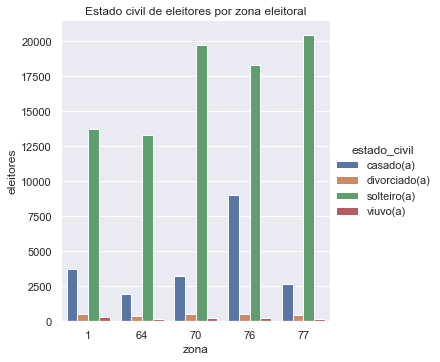

In [120]:
colunas = ['zona', 'estado_civil']
df_estado_civil = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
ax = sns.catplot(data = df_estado_civil, x = 'zona', y = 'eleitores', kind ='bar', hue = 'estado_civil')
plt.title('Estado civil de eleitores por zona eleitoral');


<AxesSubplot:xlabel='secao', ylabel='eleitores'>

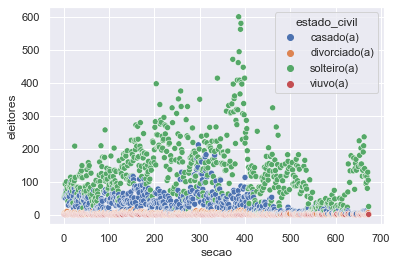

In [168]:
colunas = ['secao', 'estado_civil']
df_estado_civil = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_estado_civil = df_estado_civil.pivot(index = 'secao', columns= 'estado_civil', values='eleitores')
#df_estado_civil.fillna(0, inplace = True)
df_estado_civil
sns.scatterplot(data = df_estado_civil, y = 'eleitores', x='secao', hue = 'estado_civil')

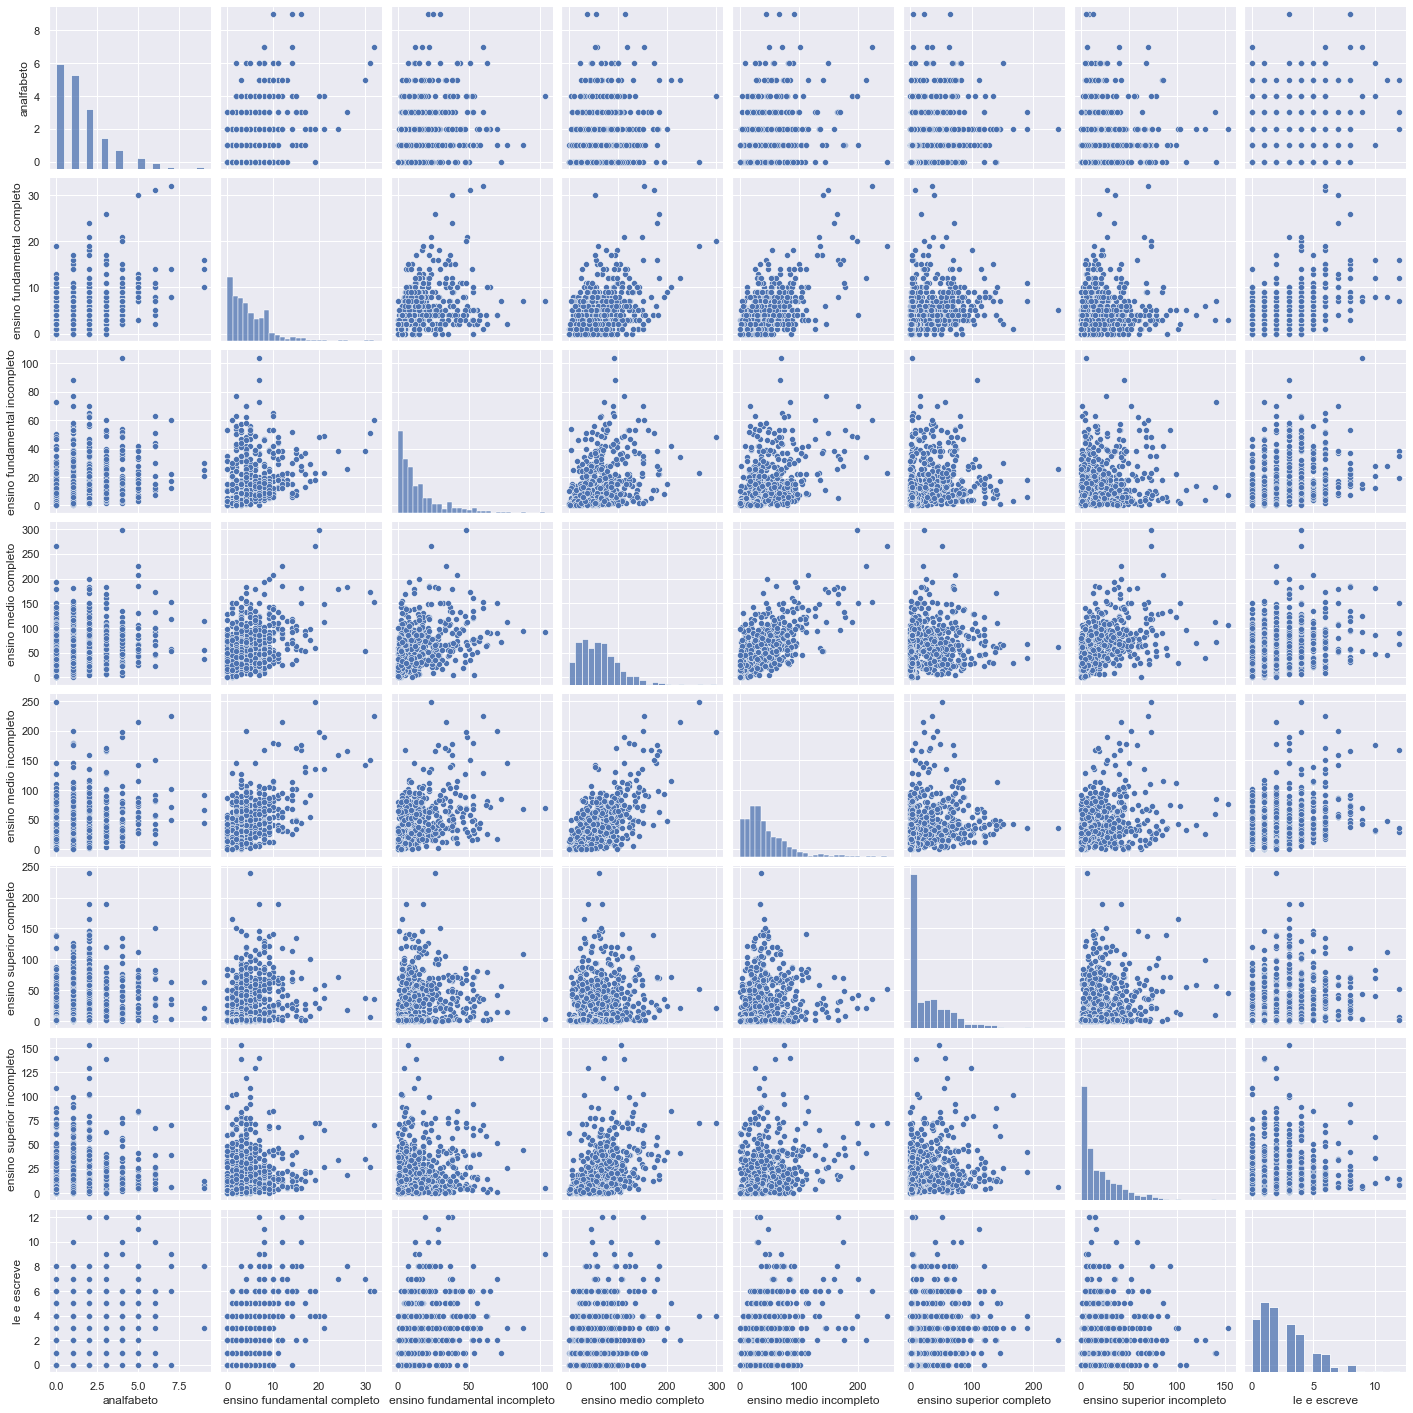

In [143]:
colunas = ['secao', 'instrucao']
df_instrucao = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
df_instrucao = df_instrucao.pivot(index = 'secao', columns= 'instrucao', values='eleitores')
df_instrucao.fillna(0, inplace = True)
sns.pairplot(data = df_instrucao)

In [133]:
df_grupo_idade_ct = pd.crosstab(index = perfil_secao.zona, columns= perfil_secao.grupo_idade, values = perfil_secao.eleitores, aggfunc='sum').reset_index()
df_grupo_idade_ct

grupo_idade,zona,100 anos ou mais,16 anos,17 anos,18 anos,19 anos,20 anos,21 a 24 anos,25 a 29 anos,30 a 34 anos,...,50 a 54 anos,55 a 59 anos,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 a 94 anos,95 a 99 anos
0,1,1.0,523.0,861.0,1226.0,1162.0,596.0,1632.0,2439.0,2111.0,...,848.0,645.0,440.0,385.0,278.0,176.0,129.0,65.0,28.0,5.0
1,64,NaN,435.0,735.0,1134.0,1078.0,645.0,2370.0,2806.0,1788.0,...,546.0,346.0,251.0,216.0,167.0,121.0,64.0,43.0,13.0,NaN
2,70,NaN,487.0,891.0,1403.0,1286.0,749.0,2960.0,5370.0,3528.0,...,636.0,407.0,378.0,294.0,210.0,126.0,57.0,23.0,6.0,1.0
3,76,4.0,726.0,1000.0,1577.0,1381.0,748.0,2147.0,3755.0,3358.0,...,925.0,1014.0,956.0,753.0,422.0,133.0,94.0,60.0,24.0,4.0
4,77,NaN,707.0,1260.0,1968.0,1791.0,1194.0,3892.0,3966.0,2474.0,...,627.0,393.0,330.0,233.0,146.0,122.0,59.0,27.0,8.0,2.0


Tratando a coluna de grupo_idade

In [123]:
colunas = ['zona', 'grupo_idade']
df_grupo_idade = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_grupo_idade = df_grupo_idade.pivot(index = 'zona', columns= 'grupo_idade', values='eleitores')
df_grupo_idade.fillna(0, inplace = True)
df_grupo_idade

,zona,grupo_idade,eleitores
0,1,100 anos ou mais,1
1,1,16 anos,523
2,1,17 anos,861
3,1,18 anos,1226
4,1,19 anos,1162
...,...,...,...
101,77,75 a 79 anos,122
102,77,80 a 84 anos,59
103,77,85 a 89 anos,27
104,77,90 a 94 anos,8


In [124]:
for i in df_grupo_idade.grupo_idade.unique()[6][4:7]:
    print(i)

 
2
4


In [125]:
def media_idade(serie):
    for i in range(len(serie)):
        if len(serie[i]) == 16:
            serie[i] =  int(serie[i][:3])
        elif len(serie[i]) == 7:
            serie[i] = int(serie[i][:3])
        elif len(serie[i]) == 12:
            serie[i] = (int(serie[i][:3]) + int(serie[i][4:7]))/2
    return serie

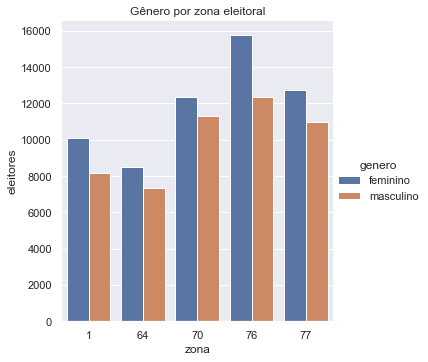

In [126]:
colunas = ['zona', 'genero']
df_genero = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_genero = df_genero.pivot(index = 'zona', columns= 'genero', values='eleitores')
df_genero.fillna(0, inplace = True)
sns.catplot(data = df_genero, x = 'zona', y = 'eleitores', kind ='bar', hue = 'genero')
plt.title('Gênero por zona eleitoral');